# Connect to Spark

In this NoteBook we read wssse values and we plot them. 

<span style="color:red">It is necessary you first run [create_wssse_csv](create_wssse_csv.ipynb).</span>.


## Dependencies

In [2]:
#Add all dependencies to PYTHON_PATH
import sys
sys.path.append("/usr/lib/spark/python")
sys.path.append("/usr/lib/spark/python/lib/py4j-0.10.4-src.zip")
sys.path.append("/usr/lib/python3/dist-packages")

#Define environment variables
import os
os.environ["HADOOP_CONF_DIR"] = "/etc/hadoop/conf"
os.environ["PYSPARK_PYTHON"] = "python3"
os.environ["PYSPARK_DRIVER_PYTHON"] = "ipython"

#Load PySpark to connect to a Spark cluster
from pyspark import SparkConf, SparkContext

from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql import DataFrameReader
from pyspark.sql import SparkSession

import matplotlib.pyplot as plt

## Create Spark Context

In [3]:
appName = "kmeans_wssse"
masterURL="spark://emma0.phenovari-utwente.surf-hosted.nl:7077"

#A context needs to be created if it does not already exist
try:
    sc.stop()
except NameError:
    print("A  new Spark Context will be created.")
    
sc = SparkContext(conf = SparkConf().setAppName(appName).setMaster(masterURL))

sqlContext = SQLContext(sc)

spark = SparkSession.builder \
        .master(masterURL) \
        .appName(appName) \
        .getOrCreate;
        
#OR
#spark = SparkSession.builder.config(conf)

A  new Spark Context will be created.


## Read Data

In [4]:
#offline_dir_path = "hdfs:///user/emma/avhrr/"
offline_dir_path = "hdfs:///user/emma/spring-index/"
#geoTiff_dir = "SOST"
geoTiff_dir = "LeafFinal"
wssse_csv_path = offline_dir_path + geoTiff_dir + "/wssse.csv"
    
    
csvDf = sqlContext.read.format("csv").option("header", "false").option("inferschema", "true").option("mode", "DROPMALFORMED").load(wssse_csv_path) 
df = csvDf.toPandas()

## Plot WSSSE

In [5]:
res = df[['_c0', '_c2']].as_matrix()

<IPython.core.display.Javascript object>


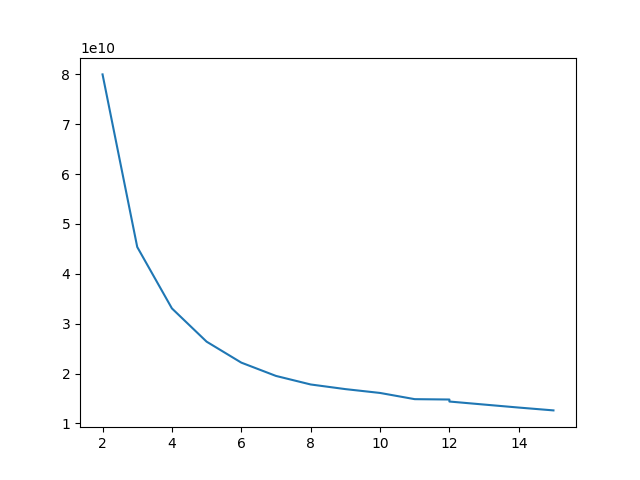

In [6]:
%matplotlib notebook

plt.plot(res[:,0],res[:,1])
plt.show()

## Close Spark Context

In [7]:
sc.stop()